In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ImportError: Unable to import required dependencies:
numpy: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
df = pd.read_csv('London_Listings.csv',dtype={'price': str})

from tabulate import tabulate
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))
# extra visualisation libraries to show the data in nicer table format
# shows first 10 rows of dataset 


+---+------------+----------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+--------------+------------+--------------------+----------------------+-------------------+---------------------+---------------------------+------------------------+-------------+--------------+-----------------------------+-----------------+--------------+-----------+----------------+----------+------+-------------------------------------------------------------

In [ ]:
print(df.shape)
# to show the shape of the dataframe including the number of rows and columns, will help keep track of data while cleaning

df_info_snapshot = df.copy()  
df_describe_snapshot = df.copy() 

print("DataFrame Info at this point:")
df_info_snapshot.info()
# data types and missing values 

print("\nDataFrame Description at this point:")
print(df_describe_snapshot.describe())
df.info()
# statistical summary of dataset 




(66679, 31)
DataFrame Info at this point:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66679 entries, 0 to 66678
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66679 non-null  float64
 1   name                            66679 non-null  object 
 2   description                     64723 non-null  object 
 3   host_id                         66679 non-null  int64  
 4   host_name                       66678 non-null  object 
 5   host_since                      66678 non-null  object 
 6   host_response_rate              56504 non-null  object 
 7   host_acceptance_rate            59533 non-null  object 
 8   host_is_superhost               66299 non-null  object 
 9   host_listings_count             66678 non-null  float64
 10  host_total_listings_count       66678 non-null  float64
 11  neighbourhood                   66679 non-null  obj

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print("Initial numerical data list:", numeric_data.columns.tolist())
print("Initial categorical data list:", categorical_data.columns.tolist())
# selects all variables of data numerical and non-numerical data types and splits them into numerical and categorical(non-numerical) data types then prints lists of the variables(column names)


Initial numerical data list: ['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']
Initial categorical data list: ['name', 'description', 'host_name', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'calendar_last_scraped', 'first_review', 'last_review']


In [ ]:
if 'price' in df.columns:
    print("Data type of 'price' before cleaning:", df['price'].dtype)
    print("Number of NaN values in 'price':", df['price'].isnull().sum())

    # Convert to string for handling NaNs
    df['price'] = df['price'].astype(str)

    # Showing values containing '$' before cleaning
    print("Values containing '$' before cleaning:\n",df['price'][df['price'].str.contains(r'\$', regex=True)].head(10))

    # Remove non-numeric characters and convert to numeric
    df['price'] = df['price'].str.replace(r'[^0-9.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

    # Showing values containing '$' after cleaning
    print("Values containing '$' after cleaning:", df['price'][df['price'].astype(str).str.contains(r'\$', regex=True)].head())

    print("Data type of 'price' after cleaning:", df['price'].dtype)
    print("Number of NaN values in 'price':", df['price'].isnull().sum())

Data type of 'price' before cleaning: object
Number of NaN values in 'price': 5261
Values containing '$' before cleaning:
 0    $200.00
1    $675.00
2     $95.00
3    $166.00
4    $105.00
5    $134.00
6    $280.00
7    $360.00
8    $546.00
9     $87.00
Name: price, dtype: object
Values containing '$' after cleaning: Series([], Name: price, dtype: float64)
Data type of 'price' after cleaning: float64
Number of NaN values in 'price': 5261


In [ ]:
# i identified a few more features similar to 'price' that are numerical but have symbols so have been misplaced in the categorical list, therefore i decided to similarly clean them too

def clean_percentage(df, col_name):
    if col_name in df.columns:
        print(f"Data type of '{col_name}' before cleaning:", df[col_name].dtype)
        print(f"Number of NaN values in '{col_name}':", df[col_name].isnull().sum())

        # Convert to string for handling NaNs
        df[col_name] = df[col_name].astype(str)

        # Showing values containing '%' before cleaning
        print(f"Values containing '%' before cleaning in '{col_name}':\n",
              df[col_name][df[col_name].str.contains('%', regex=False)].head(10))

        # Remove non-numeric characters and convert to numeric
        df[col_name] = df[col_name].str.replace('%', '', regex=False).str.strip()  # Remove '%' and any extra spaces
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

        # Showing values containing '%' after cleaning
        print(f"Values containing '%' after cleaning in '{col_name}':",
              df[col_name][df[col_name].astype(str).str.contains('%', regex=False)].head())

        print(f"Data type of '{col_name}' after cleaning:", df[col_name].dtype)
        print(f"Number of NaN values in '{col_name}':", df[col_name].isnull().sum())
    return df

# Clean 'host_response_rate' and 'host_acceptance_rate'
df = clean_percentage(df, 'host_response_rate')
df = clean_percentage(df, 'host_acceptance_rate')

Data type of 'host_response_rate' before cleaning: object
Number of NaN values in 'host_response_rate': 10175
Values containing '%' before cleaning in 'host_response_rate':
 2      86%
3      98%
4     100%
5     100%
6     100%
7      90%
8     100%
11     70%
12    100%
13    100%
Name: host_response_rate, dtype: object
Values containing '%' after cleaning in 'host_response_rate': Series([], Name: host_response_rate, dtype: float64)
Data type of 'host_response_rate' after cleaning: float64
Number of NaN values in 'host_response_rate': 10175
Data type of 'host_acceptance_rate' before cleaning: object
Number of NaN values in 'host_acceptance_rate': 7146
Values containing '%' before cleaning in 'host_acceptance_rate':
 2      50%
3      93%
4      95%
5       0%
6      97%
7      72%
8      77%
11     65%
12    100%
13     86%
Name: host_acceptance_rate, dtype: object
Values containing '%' after cleaning in 'host_acceptance_rate': Series([], Name: host_acceptance_rate, dtype: float64)
D

In [ ]:
# features identified from categorical features list that are actually numerical but just contain symbols (e.g. £ or %)
cols_to_move = ['host_response_rate', 'host_acceptance_rate', 'price']

        
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_list = numeric_data.columns.tolist()
categorical_list = categorical_data.columns.tolist()

print("Final numerical data list:", numeric_list)
print("Final categorical data list:", categorical_list)

Final numerical data list: ['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']
Final categorical data list: ['name', 'description', 'host_name', 'host_since', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review']


In [ ]:
print("Number of NaN values:", categorical_data.isnull().sum().sum())
print(categorical_data.shape)

print(categorical_data.head(10))

# Clean categorical data
def remove_empty_str_ls(val):
    if isinstance(val, str):
        val = val.strip()  # removes leading/trailing whitespace
        if val == '' or val == '[]':  # checks for empty lists and strings 
            return np.nan
        else:
            return val
    elif isinstance(val, list) and not val:
        return np.nan
    else:
        return val

categorical_data = categorical_data.applymap(remove_empty_str_ls)

# Check for NaN values
print("Number of NaN values:", categorical_data.isnull().sum().sum())
print(categorical_data.shape)


Number of NaN values: 31910
(66679, 13)
                                                name  \
0                                                  1   
1                                                  1   
2                                                117   
3                - Bright Central London Apartment -   
4                  " Bright & Cosy  Loft apartment "   
5      "Beautiful and spacious 2 Bedroom Maisonette"   
6                          "Bijou"  in Sloane square   
7  "Blue heaven"-chic House in quiet central loca...   
8  "Bohemian Luxury" Unique London Pub Now Posh Home   
9                   "Bright and "Cozy Flat Available   

                                         description     host_name  \
0                                                NaN          Alex   
1  Get comfortable and enjoy plenty of extra room...      Lili-Ann   
2  Keep it simple at this peaceful and centrally-...    Shujauddin   
3  My apartment has everything you possibly need ...          A

/var/folders/7x/6gwtx5450_9gbs4860s4qk800000gn/T/ipykernel_24682/1203272319.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorical_data = categorical_data.applymap(remove_empty_str_ls)


In [ ]:
# combining the two dataframes back together (numeric and categorical)
combined_df = pd.concat([numeric_data, categorical_data], axis=1)
df = combined_df.copy() # replace the original dataframe with the combined dataframe

In [ ]:
missing_values = pd.isnull(df).values.sum()
print("Sum of missing values:", missing_values)
# total sum of missing values in the dataset

print(df.info()) 
# this shows the data type of each column and the number of non-null values in each column (summary statistics)
# essentially shows the distribution of missing values across the dataset (columns at this point with 66679 do not contain any missing values)

missing_values_show = pd.isnull(df).head(15)
print(tabulate(missing_values_show, headers='keys', tablefmt='pretty'))
# small insight into where missing values can be seen in the dataset

Sum of missing values: 80196
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66679 entries, 0 to 66678
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66679 non-null  float64
 1   host_id                         66679 non-null  int64  
 2   host_response_rate              56504 non-null  float64
 3   host_acceptance_rate            59533 non-null  float64
 4   host_listings_count             66678 non-null  float64
 5   host_total_listings_count       66678 non-null  float64
 6   latitude                        66679 non-null  float64
 7   longitude                       66679 non-null  float64
 8   accommodates                    66679 non-null  int64  
 9   bathrooms                       61350 non-null  float64
 10  bedrooms                        66578 non-null  float64
 11  beds                            61279 non-null  float64
 12  pri

In [ ]:
# dropping unnecessary columns: dropped bathrooms and used cleaned bathrooms_text instead

import re  # imported the re module for regular expressions

# comparing missing values count in bathrooms and bathrooms_text dataframes: 

print("Missing values in 'bathrooms' before:")
print(df['bathrooms'].isnull().sum())

print("\nMissing values in 'bathrooms_text' before:")
print(df['bathrooms_text'].isnull().sum())

def extract_bathrooms_num(text):
    if isinstance(text, str):
        match = re.search(r'(\d+\.?\d*)', text)  # finding numbers including decimals
        if match:
            return float(match.group(1))
    return np.nan  # return NaN if no number is found

df['bathrooms'] = df['bathrooms_text'].apply(extract_bathrooms_num)
# adding the cleaned bathrooms_text column to the numeric data frame now that all text and non numerics have been removed 

df = df.drop(['bathrooms_text'], axis=1)

# checking for missing values AFTER the change to show change was made successfully
print("\nMissing values in 'bathrooms' AFTER:")
print(df['bathrooms'].isnull().sum())

# display the first 10 rows of numerical df for brief check
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Missing values in 'bathrooms' before:
5329

Missing values in 'bathrooms_text' before:
100

Missing values in 'bathrooms' AFTER:
659
+---+------------+-----------+--------------------+----------------------+---------------------+---------------------------+-------------+--------------+--------------+-----------+----------+------+-------+----------------+----------------+-------------------+----------------------+--------------------------------+----------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df = df.drop(["latitude", "longitude"], axis=1)  # dropping unnecessary columns 'latitude' and 'longitude'
print(df.shape)

(66679, 28)


In [ ]:
# checking all calendar_last_scraped dates are within the range of the dataset (contributing the the reliability of all datapoints), before deleting the column entirely (as it is unnecessary outside this check).

# first convert 'calendar_last_scraped' to datetime objects
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

# finding the earliest and latest dates
earliest_date = df['calendar_last_scraped'].min()
latest_date = df['calendar_last_scraped'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

unique_dates = df['calendar_last_scraped'].unique()
print("Number of unique dates:", len(unique_dates))

print(unique_dates.tolist())

Earliest date: 2024-06-14 00:00:00
Latest date: 2024-06-20 00:00:00
Number of unique dates: 4
[Timestamp('2024-06-14 00:00:00'), Timestamp('2024-06-15 00:00:00'), Timestamp('2024-06-16 00:00:00'), Timestamp('2024-06-20 00:00:00')]


/var/folders/7x/6gwtx5450_9gbs4860s4qk800000gn/T/ipykernel_24682/3270690870.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])


In [ ]:
# dropping calendar_last_scraped column entirely as already checked that all dates are within the range of the dataset

df = df.drop(['calendar_last_scraped'], axis=1)
print(df.shape)

(66679, 27)


In [ ]:
import pandas as pd

# verifying that host_total_listings_count represents historical high while host_listings_count represents current count

greater_count_cases = df[df['host_total_listings_count'] < df['host_listings_count']]
print("Number of cases where host_total_listings_count < host_listings_count:", len(greater_count_cases))

greater_count_cases = df[df['host_total_listings_count'] >= df['host_listings_count']]
print("Number of cases where host_total_listings_count > host_listings_count:", len(greater_count_cases))

# therefore decided to keep both columns as they are both significant in their own ways


Number of cases where host_total_listings_count < host_listings_count: 0
Number of cases where host_total_listings_count > host_listings_count: 66678


In [ ]:
# removing duplicate rows from the dataset
df = df.drop_duplicates()
print(df.shape)

# successful reduction of rows shown through the shape of the dataframe

(66629, 27)


In [ ]:
# removing all rows with any missing values, even one
df = df.dropna(axis=0, how='any')
print(df.shape)

# used the df.shape() function to keep track of shape while cleaning to make sure I am not throwing away too much data while cleaning

(41605, 27)


In [ ]:
import numpy as np
from scipy import stats

print(df.shape)

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_list = numeric_data.columns.tolist()
categorical_list = categorical_data.columns.tolist()
# represents a newly updated list of numerical and categorical data after dropping a few unnecessary columns (e.g. calendar_last_scraped) and altering many others 

print("Numerical data list:", numeric_list)
print("Categorical data list:", categorical_list)

df_zscores = df[['minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds']].copy()
# working out z-score for features where it would be sensible to manipulate outliers 

df_zscores = df_zscores.apply(stats.zscore)
# for each value in the dataframe(the one with selected columns from main df) the z-score is calculated based on the specific column

outlier_mask = (df_zscores < -3) | (df_zscores > 3)
# boolean function to identify outliers amongst the values

df_zscores[outlier_mask] = np.nan
# replaces identified outliers with nan values

df = df.drop(['minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds'], axis=1)
df = pd.concat([df, df_zscores], axis=1)
# combine the old dataframe with the newly filter columns where outliers have been replaced with nan values

print(df.shape)

(41605, 27)
Numerical data list: ['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']
Categorical data list: ['name', 'description', 'host_name', 'host_since', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'amenities', 'first_review', 'last_review']
(41605, 27)


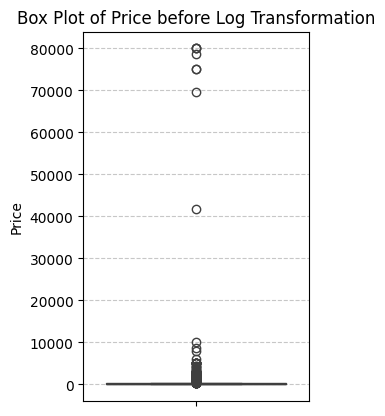

In [ ]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 2st subplot
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price before Log Transformation')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# box plot to show extreme values and effect on the distribution of the data before log transformation


In [ ]:
df_normal = df
print(df_normal.head(10))


              id    host_id  host_response_rate  host_acceptance_rate  \
3   8.730000e+17   99268099                98.0                  93.0   
4   4.672403e+07  359199241               100.0                  95.0   
6   8.550000e+17  296652222               100.0                  97.0   
7   1.688942e+07   21917428                90.0                  72.0   
8   9.590000e+17  195918146               100.0                  77.0   
11  9.530000e+17  530597694                70.0                  65.0   
12  1.140000e+18  480888562               100.0                 100.0   
15  1.110000e+18  551426148               100.0                  66.0   
16  9.500000e+17    2147238                89.0                  53.0   
17  1.070000e+18  399051716               100.0                  39.0   

    host_listings_count  host_total_listings_count  price  number_of_reviews  \
3                   5.0                       23.0  166.0                 24   
4                   1.0             

count    41604.000000
mean         4.898538
std          0.760761
min          2.302585
25%          4.330733
50%          4.905275
75%          5.393628
max         11.289782
Name: price, dtype: float64
Number of infinite values after transformation: 0
Number of NaN values after transformation: 0
<class 'pandas.core.frame.DataFrame'>
Index: 41604 entries, 3 to 66678
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41604 non-null  float64
 1   host_id                         41604 non-null  int64  
 2   host_response_rate              41604 non-null  float64
 3   host_acceptance_rate            41604 non-null  float64
 4   host_listings_count             41604 non-null  float64
 5   host_total_listings_count       41604 non-null  float64
 6   price                           41604 non-null  float64
 7   number_of_reviews               41604 non-n

/var/folders/7x/6gwtx5450_9gbs4860s4qk800000gn/T/ipykernel_24682/1262703384.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace([np.inf, -np.inf], np.nan, inplace=True)


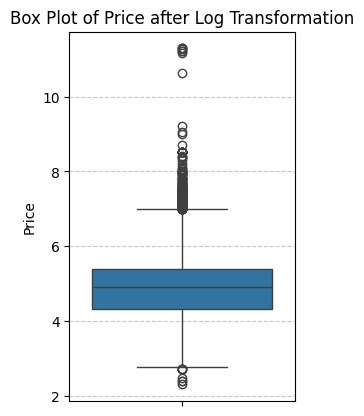

In [ ]:
# Replace negative or zero price values with NaN
df.loc[df['price'] <= 0, 'price'] = np.nan

# Log transformation on price, avoiding NaN warning
df['price'] = np.log(df['price'])

# Replace infinite values with NaN
df['price'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN in the prices
df = df.dropna(subset=['price'])

print(df['price'].describe())
print("Number of infinite values after transformation:", np.isinf(df['price']).sum())
print("Number of NaN values after transformation:", df['price'].isna().sum())

print(df.info()) 
# checking how many missing numbers in prices

plt.subplot(1, 2, 1) # 1 row, 2 columns, 2st subplot
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price after Log Transformation')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# box plot after logrithmic transformation to how influence of extreme values reduced and data more evenly distributed 

In [ ]:
numeric_data_excluding_price = numeric_data.drop(columns=['price'], errors='ignore')
df[numeric_data_excluding_price.columns] = (numeric_data_excluding_price - numeric_data_excluding_price.min()) / (numeric_data_excluding_price.max() - numeric_data_excluding_price.min())
# normalising the numerical data to a 0-1 scale
# overwriting the original numerical data with the normalised data 

/var/folders/7x/6gwtx5450_9gbs4860s4qk800000gn/T/ipykernel_24682/2402151366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_data_excluding_price.columns] = (numeric_data_excluding_price - numeric_data_excluding_price.min()) / (numeric_data_excluding_price.max() - numeric_data_excluding_price.min())


In [ ]:
print(tabulate(df.head(25), headers='keys', tablefmt='pretty'))
print(df.shape)


+----+------------------------+----------------------+--------------------+----------------------+-----------------------+---------------------------+--------------------+-----------------------+----------------------+--------------------------------+----------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+------------+-------------------+------------------------+-----------------------------+-----------------+------------------

count    41604.000000
mean         4.898538
std          0.760761
min          2.302585
25%          4.330733
50%          4.905275
75%          5.393628
max         11.289782
Name: price, dtype: float64


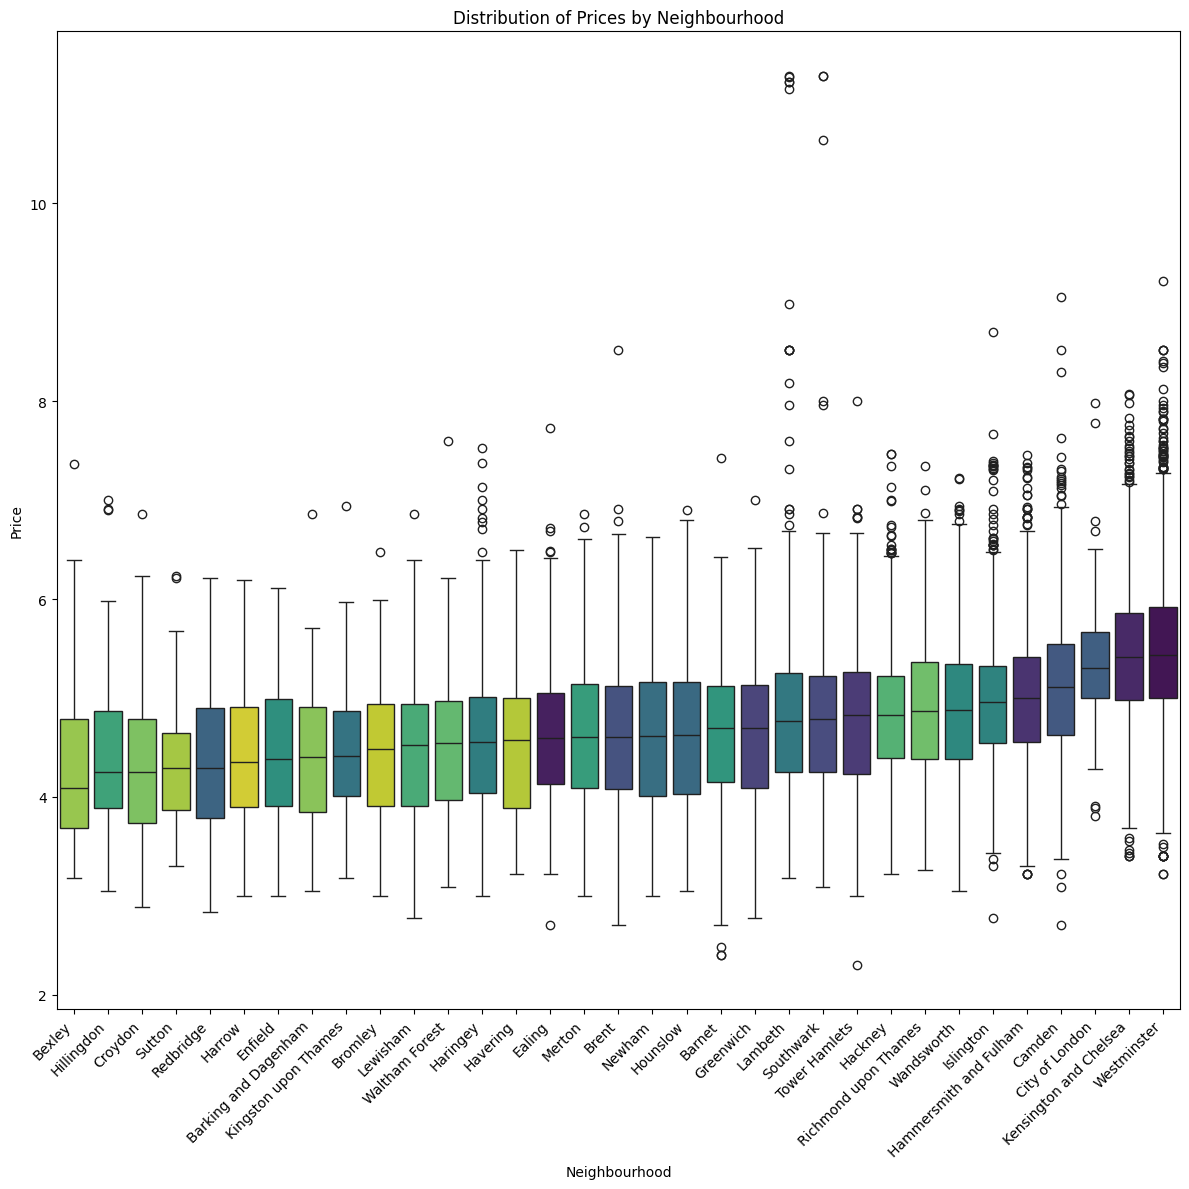

In [ ]:
# visualising the distribution of prices by neighbourhood

print(df['price'].describe()) # starting off by attaining a good overview of general statistics surrounding the price within this dataset

plt.figure(figsize=(12, 12)) # adjusted figure size as needed to show spread adequately 

median_prices = df.groupby('neighbourhood')['price'].median().sort_values()
# calculates the median prices by neighbourhood so plots can be ordered by median price

# creates a boxplot of the prices by neighbourhood
sns.boxplot(x='neighbourhood', y='price', data=df, order=median_prices.index, palette='viridis', hue='neighbourhood')

plt.title('Distribution of Prices by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') # rotates labels as there are many neighbourhoods, this way all neighbourhood labels can be seen
plt.tight_layout() # adjusts the layout to prevent overlap of labels
plt.show()


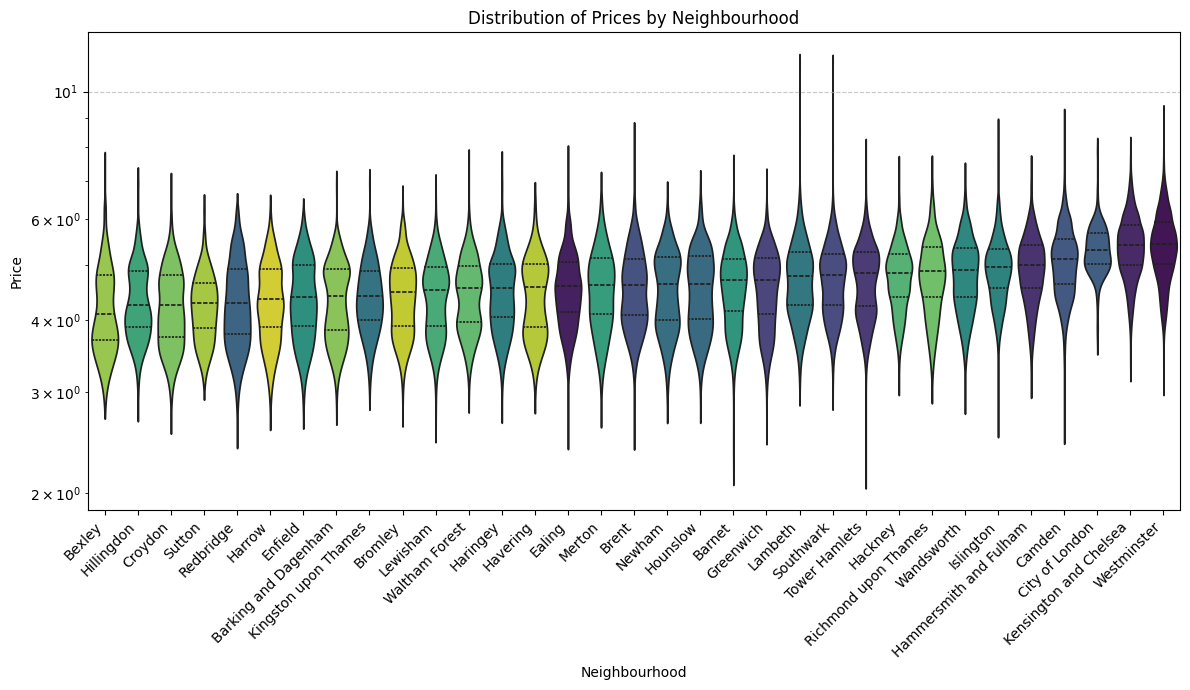

In [ ]:
# further visualisation of the distribution of prices by neighbourhood


plt.figure(figsize=(12, 7)) # adjusted figure size as needed to show spread adequately

# calculates median prices for sorting (handle potential NaNs)
median_prices = df.groupby('neighbourhood')['price'].median().sort_values()

# creates violin plot of the prices by neighbourhood
sns.violinplot(x='neighbourhood',
               y='price',
               data=df,
               order=median_prices.index,
               palette='viridis',
               inner='quartile',
               hue='neighbourhood') 

# log scale on y axis for better visualisation
plt.yscale('log')

plt.title('Distribution of Prices by Neighbourhood') 
plt.xlabel('Neighbourhood')
plt.ylabel('Price') 
plt.xticks(rotation=45, ha='right') # adjusts the layout to prevent overlap of labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # adjusts the layout to prevent overlap of labels
plt.show()

In [ ]:
print("Counts per neighbourhood:")
neighbourhood_counts = df['neighbourhood'].value_counts()
print(neighbourhood_counts)

# verifying the density changes we see within the violin plot 

Counts per neighbourhood:
neighbourhood
Westminster               5577
Kensington and Chelsea    3081
Tower Hamlets             3046
Camden                    3041
Hackney                   2334
Lambeth                   2149
Southwark                 2120
Islington                 2116
Wandsworth                1999
Hammersmith and Fulham    1837
Brent                     1403
Barnet                    1095
Ealing                    1040
Newham                    1037
Lewisham                  1013
Haringey                   968
Greenwich                  913
Waltham Forest             812
Croydon                    688
Merton                     623
Richmond upon Thames       616
Hounslow                   597
Hillingdon                 445
Enfield                    406
Redbridge                  395
Bromley                    388
City of London             303
Harrow                     302
Barking and Dagenham       296
Kingston upon Thames       286
Bexley                     263

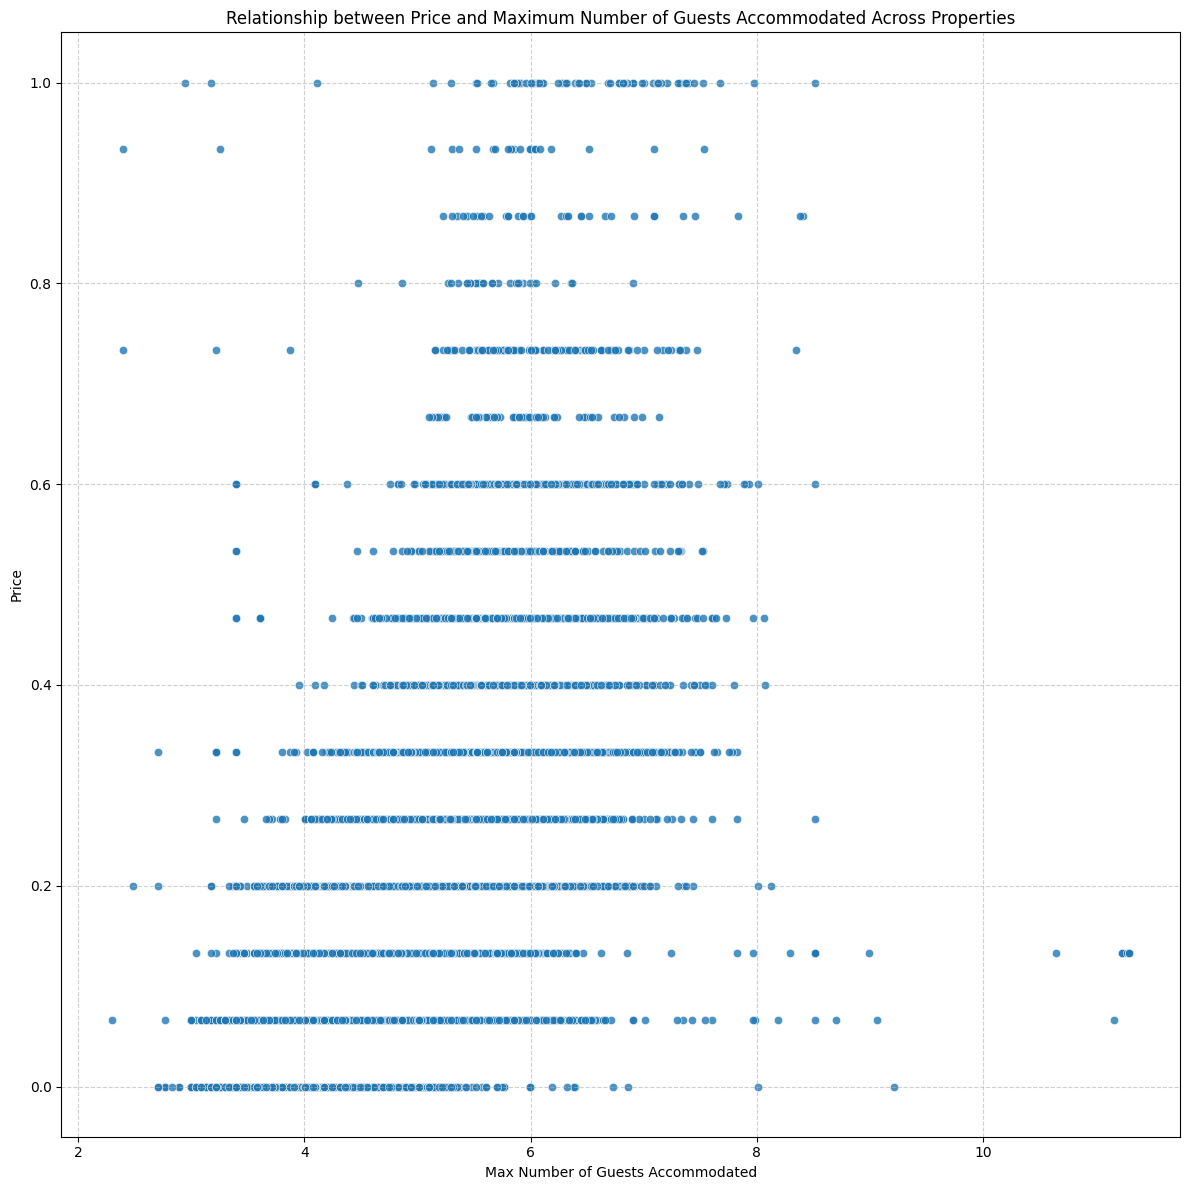


Average price (calculated from mean): 0.1620789667660161


In [ ]:
# df['accommodates'] = np.log(df['accommodates'])
# considered log transformation on accommodates to make it more normally distributed

plt.figure(figsize=(12,12))

# creates the scatter plot using seaborn
sns.scatterplot(data=df, x='price', y='accommodates', alpha=0.8) # alpha adds transparency for overlapping points

# plt.yscale('log') # log scale on y axis for better visualisation

# plot customisations
plt.title('Relationship between Price and Maximum Number of Guests Accommodated Across Properties')
plt.xlabel('Max Number of Guests Accommodated')
plt.ylabel('Price') 
plt.grid(True, linestyle='--', alpha=0.6) # adds a light grid
plt.tight_layout() 
plt.show()

mean_price = df['accommodates'].mean()
print(f"\nAverage price (calculated from mean): {mean_price}")


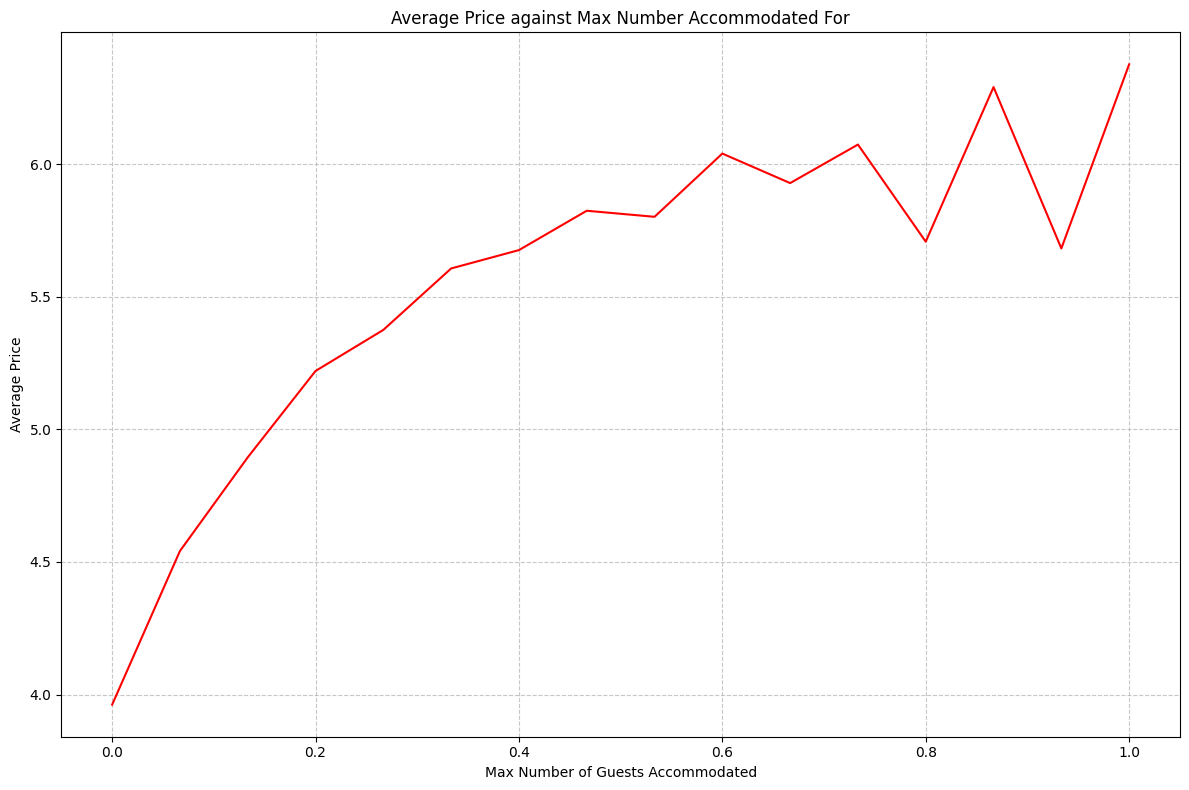

In [ ]:
price_trend = df.groupby('accommodates')['price'].mean().reset_index()

plt.figure(figsize=(12, 8)) # creates the line plot

sns.lineplot(data=price_trend, x='accommodates', y='price', color = 'red')

plt.title('Average Price against Max Number Accommodated For')
plt.xlabel('Max Number of Guests Accommodated')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

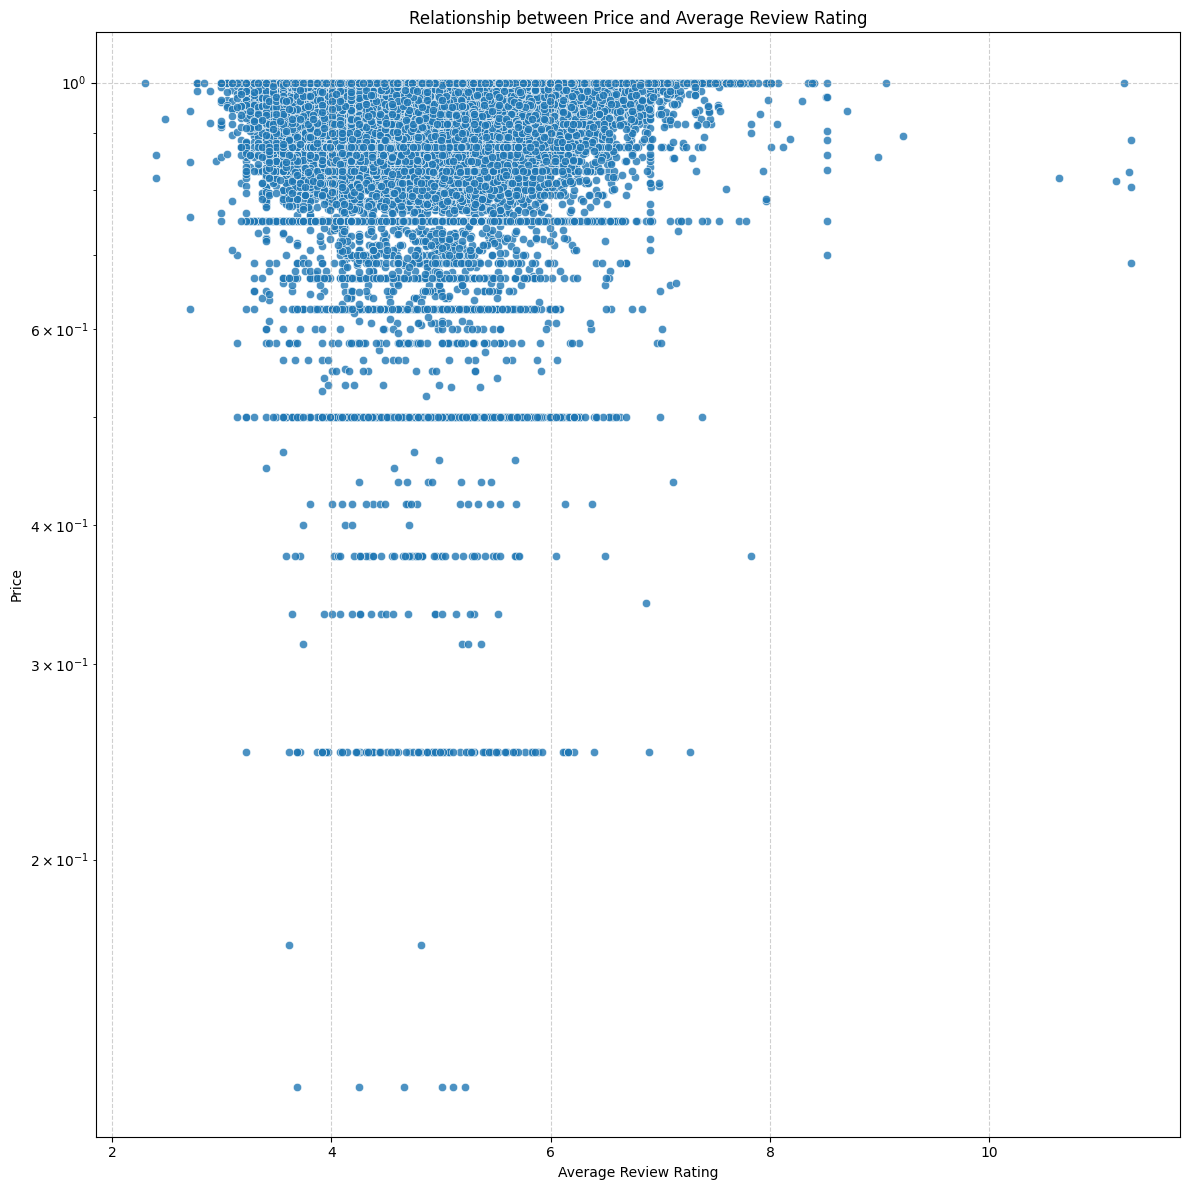

count    41604.000000
mean         0.922278
std          0.114607
min          0.000000
25%          0.895000
50%          0.957500
75%          1.000000
max          1.000000
Name: review_scores_rating, dtype: float64


In [ ]:
plt.figure(figsize=(12,12))

# creates the scatter plot using seaborn
sns.scatterplot(data=df, x='price', y='review_scores_rating', alpha=0.8) # alpha adds transparency for overlapping points

plt.yscale('log') # log scale on y axis for better visualisation

# plot customisations
plt.title('Relationship between Price and Average Review Rating')
plt.xlabel('Average Review Rating')
plt.ylabel('Price') 
plt.grid(True, linestyle='--', alpha=0.6) #adds a light grid
plt.tight_layout() 
plt.show()

print(df['review_scores_rating'].describe())

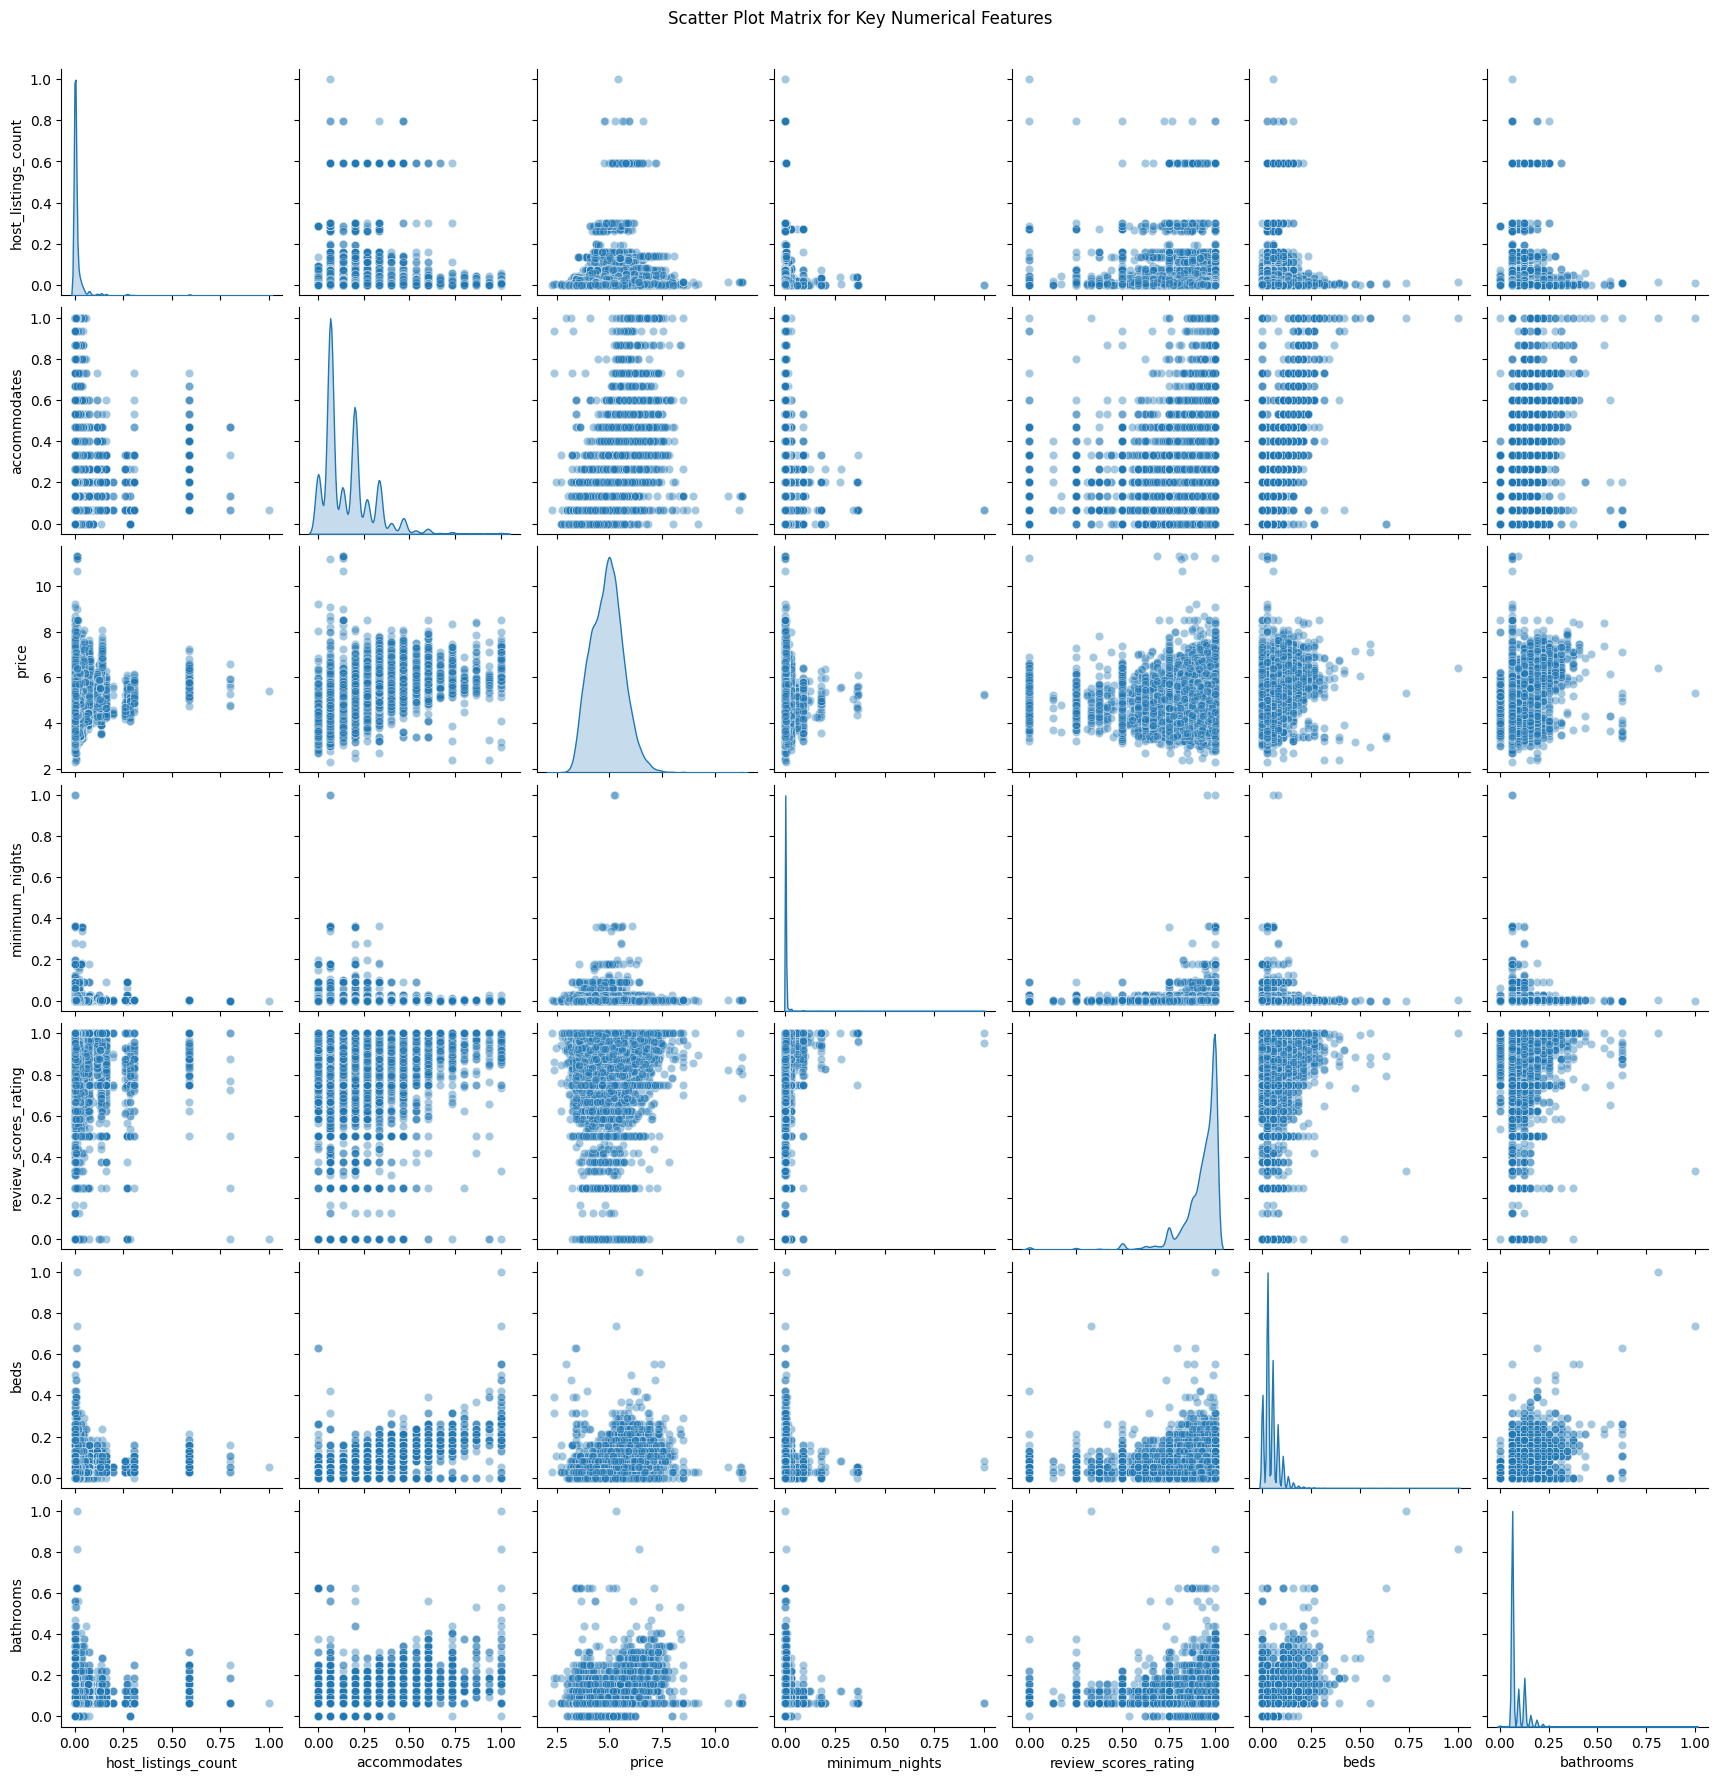

In [ ]:
# Drop rows with NaN in any of the selected columns for the pairplot
matrix_features = df[['host_listings_count', 'accommodates', 'price', 'minimum_nights', 'review_scores_rating', 'beds', 'bathrooms']].copy()


pairplot_fig = sns.pairplot(matrix_features,
                            diag_kind='kde',
                            plot_kws={'alpha': 0.4},
                            ) 
# creates scatter plot matrix 

pairplot_fig.fig.suptitle('Scatter Plot Matrix for Key Numerical Features', y=1.02) 
plt.show()

Correlation Matrix for Key Numerical Features variables:

+----------------------+----------------------+-----------------------+----------------------+-----------------------+----------------------+----------------------+-----------------------+
|                      | host_listings_count  |     accommodates      |        price         |    minimum_nights     | review_scores_rating |         beds         |       bathrooms       |
+----------------------+----------------------+-----------------------+----------------------+-----------------------+----------------------+----------------------+-----------------------+
| host_listings_count  |         1.0          |  0.07522152382250093  |  0.1256034333280803  | 0.055504260410477096  | -0.12417574792965741 | 0.09454356725758988  |  0.0661529621325158   |
|     accommodates     | 0.07522152382250093  |          1.0          |  0.6524433869550869  | -0.012710965697165136 | -0.03132965115622173 |  0.7257956984513304  |  0.49090954927447894 

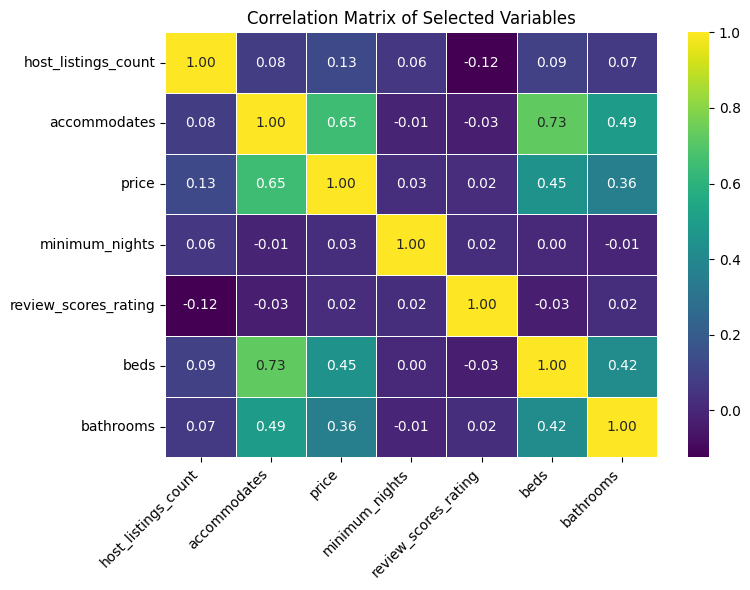

In [ ]:

correlation_matrix = matrix_features.corr()

print("Correlation Matrix for Key Numerical Features variables:\n")
print(tabulate(correlation_matrix, headers='keys', tablefmt='pretty'))


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True, # shows correlation values
            cmap="viridis", 
            #choosing colour map from built in matplotlib colour maps options 
            fmt=".2f",        
            linewidths=.5,
            annot_kws={"size": 10}) # made annotation font size bigger 

# visualised the correlation matrix as a heatmap

plt.title('Correlation Matrix of Selected Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation Matrix for Numerical Features variables:

+--------------------------------+-----------------------+-----------------------+------------------------+---------------------------+-----------------------+------------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------+--------------------------------+
|                                |  host_response_rate   | host_acceptance_rate  |  host_listings_count   | host_total_listings_count |     accommodates      |       bathrooms        |        bedrooms        |         beds          |         price          |     minimum_nights     |     maximum_nights     |   number_of_reviews   | review_scores_rating  | calculated_host_listings_count |
+--------------------------------+-----------------------+-----------------------+------------------------+---------------------------+-----------------------+-------

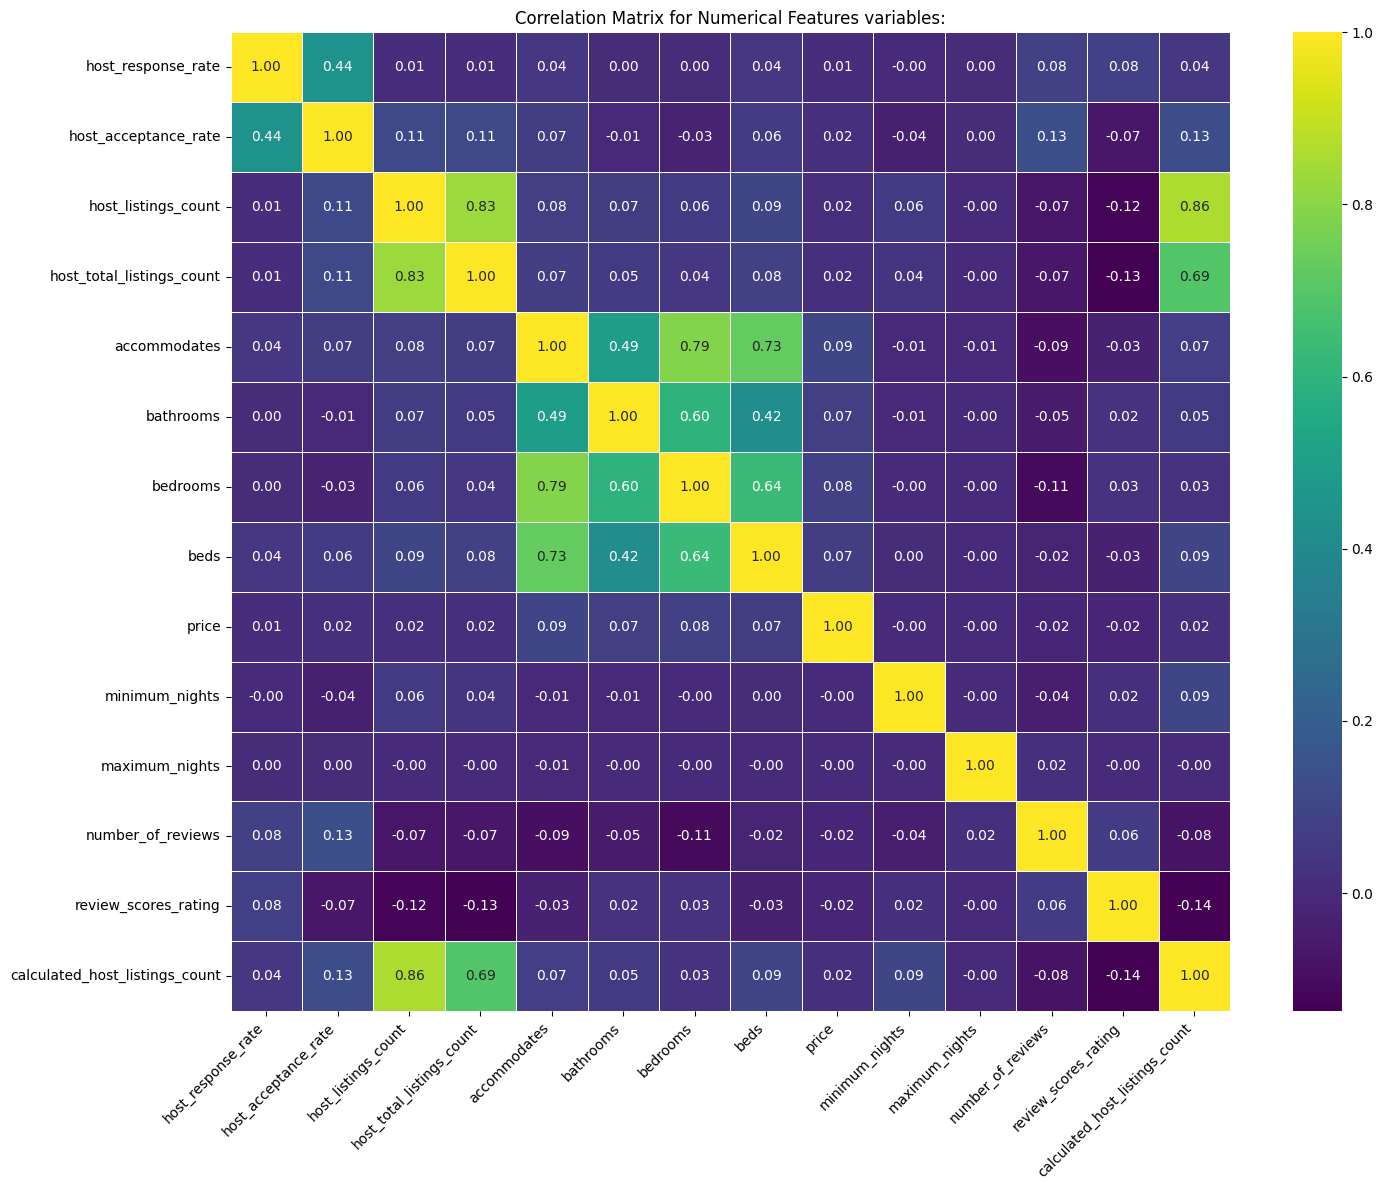

In [ ]:

correlation_matrix = numeric_data.drop(columns=['id', 'host_id'], errors='ignore').corr()

print("Correlation Matrix for Numerical Features variables:\n")
print(tabulate(correlation_matrix, headers='keys', tablefmt='pretty'))


plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,
            annot=True, # shows correlation values
            cmap="viridis", 
            #choosing colour map from built in matplotlib colour maps options 
            fmt=".2f",        
            linewidths=.5,
            annot_kws={"size": 10}) # made annotation font size bigger 

# visualised the correlation matrix as a heatmap

plt.title('Correlation Matrix for Numerical Features variables:')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

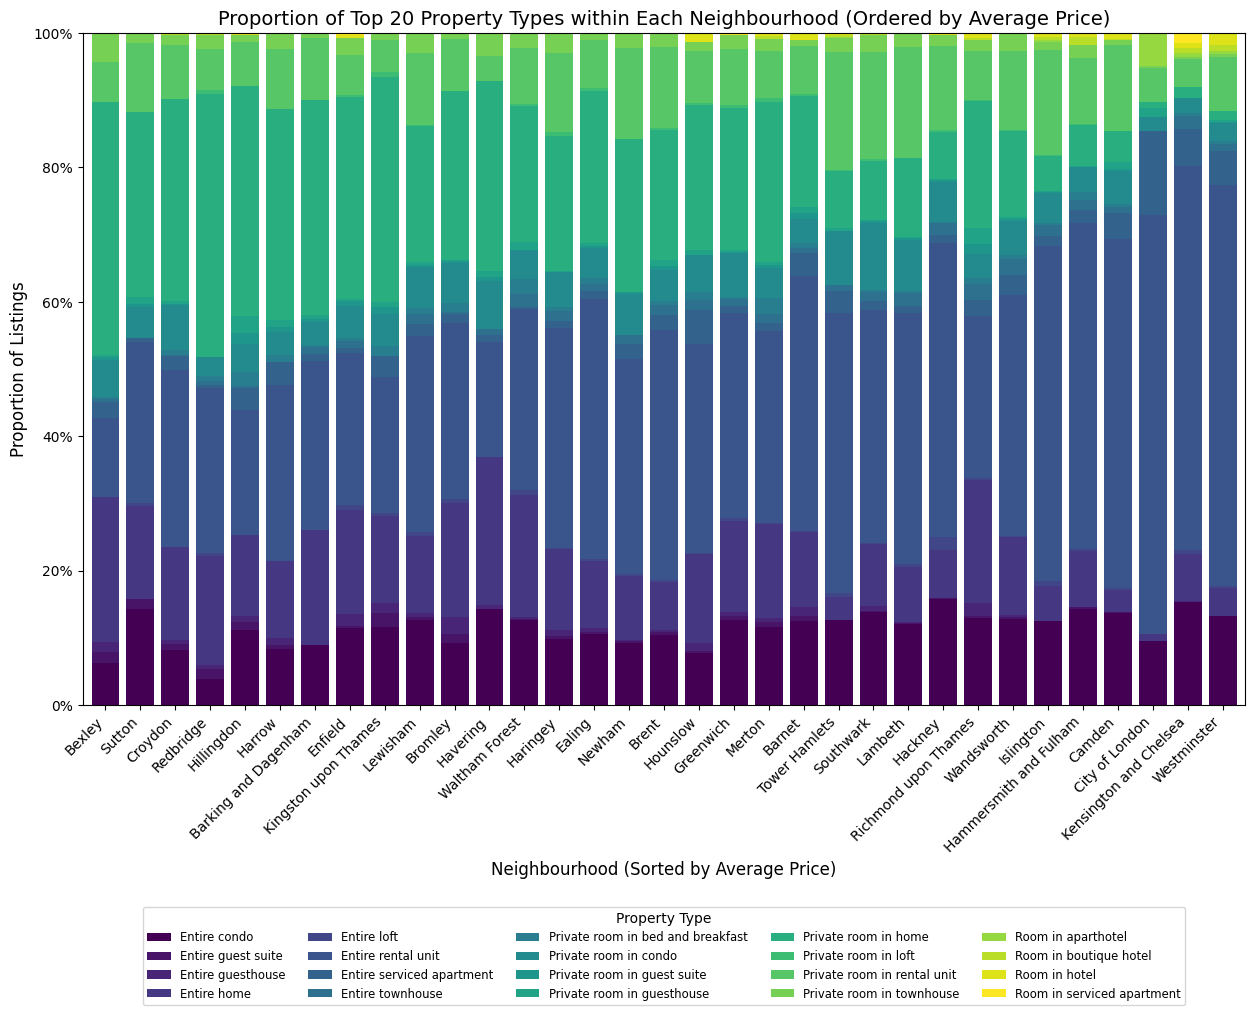

<Figure size 1500x1200 with 0 Axes>

In [ ]:
import matplotlib.ticker as mtick

top_20_property_types = df['property_type'].value_counts().head(20).index.tolist()
df_filtered = df[df['property_type'].isin(top_20_property_types)].copy()
# retreiving the top 20 property types

props = df_filtered.groupby('neighbourhood')['property_type'] \
                   .value_counts(normalize=True) \
                   .unstack(fill_value=0)
# proportions for features property types

avg_prices_per_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values() 
# sorts neighbourhoods in ascending (cheapest to most expensive)

neighbourhood_order = avg_prices_per_neighbourhood.index
# gets the sorted neighbourhood names from the index

# this ensures the plotted data is ordered by price and handles potential missing neighbourhoods if needed.
props_ordered = props.reindex(neighbourhood_order).dropna(how='all')

# creates stacked bar with ordered data
ax = props_ordered.plot( 
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='viridis',
    width=0.8
)

ax.set_title('Proportion of Top 20 Property Types within Each Neighbourhood (Ordered by Average Price)', fontsize=14) 
ax.set_xlabel('Neighbourhood (Sorted by Average Price)', fontsize=12)
ax.set_ylabel('Proportion of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# format y-axis in percentages scale
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

num_legend_items = len(props_ordered.columns)
num_cols = min(5, num_legend_items)
# adjust max number of columns for legend

# placing legend outside plot
ax.legend(
    title='Property Type',
    bbox_to_anchor=(0.5, -0.30),
    loc='upper center', 
    borderaxespad=0.,
    fontsize='small',
    ncol=num_cols     
)

plt.subplots_adjust(top=0.95)
plt.figure(figsize=(15, 12))
plt.show()

             id   host_id  host_response_rate  host_acceptance_rate  \
3  7.398305e-01  0.170692                0.98                  0.93   
4  3.958484e-11  0.617666                1.00                  0.95   

   host_listings_count  host_total_listings_count  accommodates  bathrooms  \
3             0.002455                   0.004121      0.066667     0.0625   
4             0.000000                   0.000000      0.066667     0.0625   

   bedrooms      beds     price  minimum_nights  maximum_nights  \
3  0.045455  0.000000  5.111988        0.006012    6.935242e-07   
4  0.045455  0.026316  4.653960        0.001002    1.124119e-07   

   number_of_reviews  review_scores_rating  calculated_host_listings_count  \
3           0.013715                0.9575                             0.0   
4           0.026834                0.9725                             0.0   

      price  
3  5.111988  
4  4.653960  
accommodates                      0.453402
bathrooms                    

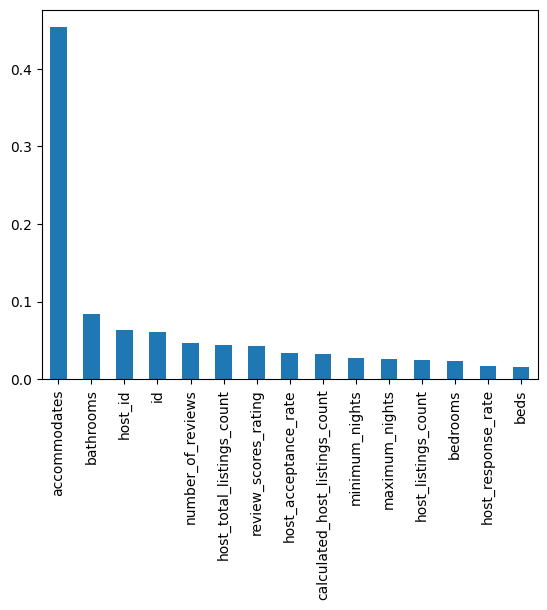

In [ ]:
# considering most influencial numerical features (alongside heatmap to avoid multicollinearity)

from sklearn.ensemble import RandomForestRegressor

# selecting the predictors that I believe would impact the arbnb prices 

randForestFeat = numeric_data.columns.tolist()
df_considering = df[randForestFeat + ['price']].copy()

print(df_considering.head(2))

X = df_considering.drop('price', axis=1)
y = df_considering['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# visualizing feature importance
feature_importance.plot(kind='bar')
plt.show()

In [ ]:
# initial predictor model building 

# selecting the predictors that I believe would impact the arbnb prices 
numerical_features = ['accommodates','host_total_listings_count','host_acceptance_rate']
categorical_features = ['neighbourhood', 'property_type', "host_is_superhost"] 

selected_features = numerical_features + categorical_features
df_model = df[selected_features + ['price']].copy()

In [ ]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 41604 entries, 3 to 66678
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41604 non-null  float64
 1   host_id                         41604 non-null  float64
 2   host_response_rate              41604 non-null  float64
 3   host_acceptance_rate            41604 non-null  float64
 4   host_listings_count             41604 non-null  float64
 5   host_total_listings_count       41604 non-null  float64
 6   price                           41604 non-null  float64
 7   number_of_reviews               41604 non-null  float64
 8   review_scores_rating            41604 non-null  float64
 9   calculated_host_listings_count  41604 non-null  float64
 10  name                            41604 non-null  object 
 11  description                     41604 non-null  object 
 12  host_name                       41604

(41604, 27)
Training set size: 33283 samples
Test set size: 8321 samples


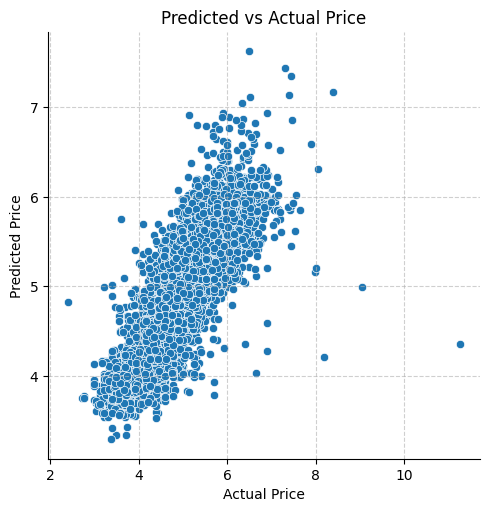

In [ ]:
# building the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)
# using dummy variables/representing categorical features with numbers so that categorical features can also be used as a predictor in the regression model
# drop_first=True helps avoid multicollinearity by dropping one category per feature

X = df_model.drop('price', axis=1)
y = df_model['price']
# feature matrix with features and target vector 

# numerical features were all already previously normalised!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# splitting the data into training and test sets using common split of 80% training data and 20% testing data 
# random_state ensures reproducibility

print(df.shape)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
# verifying that data was split 

model = LinearRegression()
model.fit(X_train, y_train)
# instatiates and trains the model

sns.relplot(x=y_test, y=model.predict(X_test), kind='scatter')
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

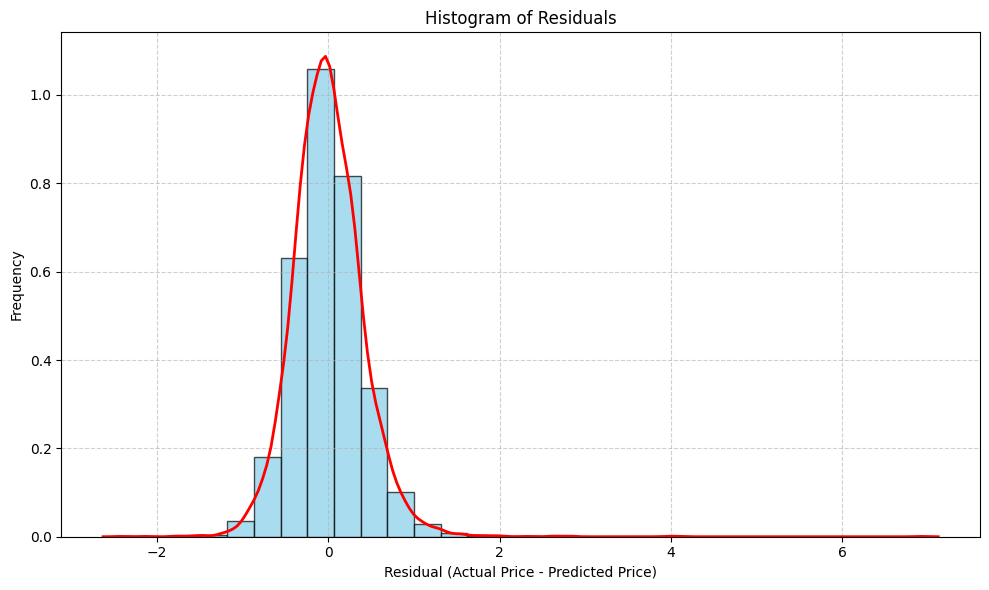


Model Evaluation on Test Set:
R-squared (R2): 0.6994204024999837
Mean Squared Error (MSE): 0.1718
Root Mean Squared Error (RMSE): 0.4145


In [ ]:
# test set and residuals

from sklearn.metrics import mean_squared_error, r2_score

y_pred=model.predict(X_test)

# calculating residuals to show how far off each individual prediction is 
residuals = y_test - y_pred

# Residual Histogram
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
sns.kdeplot(residuals, color='red', linewidth=2)
plt.title('Histogram of Residuals')
plt.xlabel('Residual (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# evaluating model performance on test data 
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nModel Evaluation on Test Set:")
print(f"R-squared (R2): {r2}") # Proportion of variance explained (higher is better)
print(f"Mean Squared Error (MSE): {mse:.4f}") # Average squared difference (lower is better)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}") # Sqrt of MSE, in price units (lower is better)

In [ ]:
from sklearn.model_selection import cross_val_score

# performing k-Fold Cross-Validation (e.g., k=5 or k=10) ---
# uses a relevant scoring metric (e.g., R-squared or neg_mean_squared_error)

print("\n5-Fold Cross-Validation:")
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_scores_neg_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# converts negative MSE back to positive MSE and calculate RMSE
cv_mse = -cv_scores_neg_mse
cv_rmse = np.sqrt(cv_mse)

# Cross-Validation Results ---
print(f"Cross-Validation R2 scores: {cv_scores_r2}")
print(f"Average CV R2: {np.mean(cv_scores_r2):.4f} (+/- {np.std(cv_scores_r2):.4f})")

print(f"\nCross-Validation RMSE scores: {cv_rmse}")
print(f"Average CV RMSE: {np.mean(cv_rmse):.4f} (+/- {np.std(cv_rmse):.4f})")


5-Fold Cross-Validation:
Cross-Validation R2 scores: [0.68017939 0.66647254 0.7133184  0.67017975 0.68686611]
Average CV R2: 0.6834 (+/- 0.0166)

Cross-Validation RMSE scores: [0.40986963 0.43531036 0.41283244 0.45228279 0.41068315]
Average CV RMSE: 0.4242 (+/- 0.0169)


No missing values found.
Original shape: (41604, 107)
Features used for clustering:

+-------+---------------------+---------------------------+----------------------+
|       |    accommodates     | host_total_listings_count | host_acceptance_rate |
+-------+---------------------+---------------------------+----------------------+
| count |       41604.0       |          41604.0          |       41604.0        |
| mean  | 0.1620789667660161  |   0.007044460386308252    |  0.864614219786559   |
|  std  | 0.13951949052343757 |    0.02595293235087436    |  0.2179931381904975  |
|  min  |         0.0         |            0.0            |         0.0          |
|  25%  | 0.06666666666666667 |  0.00018730099269526128   |         0.83         |
|  50%  | 0.13333333333333333 |   0.0007492039707810451   |         0.97         |
|  75%  |         0.2         |   0.0035587188612099642   |         1.0          |
|  max  |         1.0         |            1.0            |         1.0          |
+-

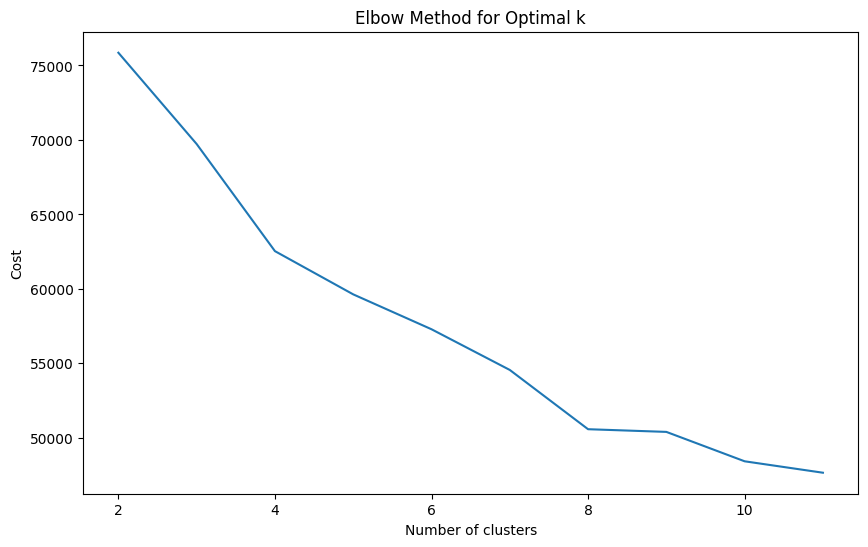

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# part 2: improved model 

# using k means clustering as an unsupervised technique that groups similar listings together based on selected features

# Select the same features for df_improved_model
df_improved_model = df_model.copy()
df_improved_model = df_improved_model.drop(columns=['price'], errors='ignore')

if df_improved_model.isnull().sum().sum() > 0:
    print("\nFilling missing values with column medians...")
    for col in df_improved_model.columns:
        if df_improved_model[col].isnull().any():
            median_val = df_improved_model[col].median()
            df_improved_model[col].fillna(median_val, inplace=True)
    print("NaNs after handling:", df_improved_model.isnull().sum().sum())
else:
    print("No missing values found.")

print(f"Original shape: {df_improved_model.shape}")

print("Features used for clustering:\n")
print(tabulate(df_improved_model.describe(), headers='keys', tablefmt='pretty'))
# features used for clustering 

print("\nPlotting elbow method...")
sse = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init='auto', verbose=0)
    kmeans.fit(df_improved_model)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()


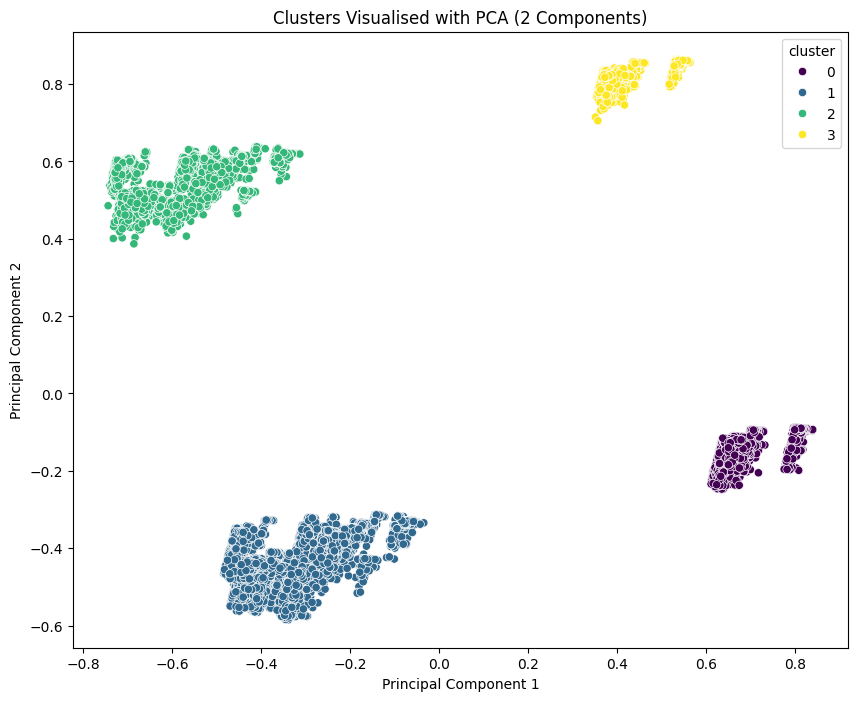


Descriptive Statistics per Cluster:
+---------+---------------------------+--------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+----------------------------------------+---------------------------------------+--------------------------------------+--------------------------------------+--------------------------------------+--------------------------------------+--------------------------------------+--------------------------------------+-----------------------------------+----------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+
| cluster | ('accommodates', 'count') | ('accommodates', 'mean') | ('accommodates', 'std') | ('accommodates', 'min') | ('accommodates', '25%') | ('acc

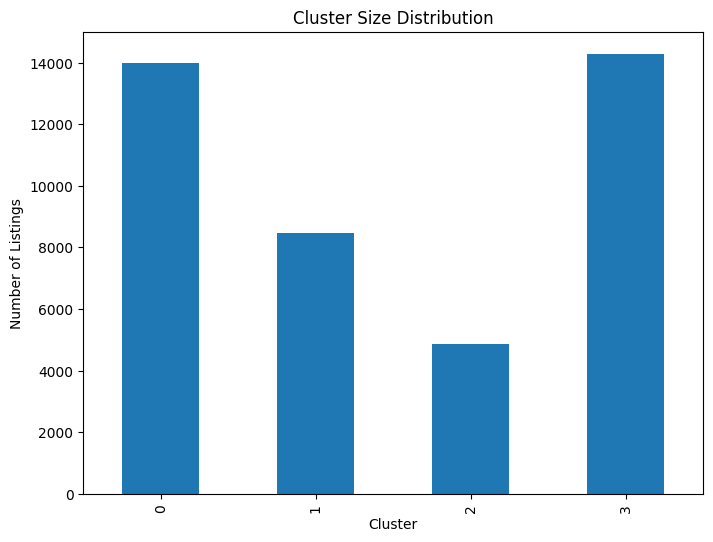

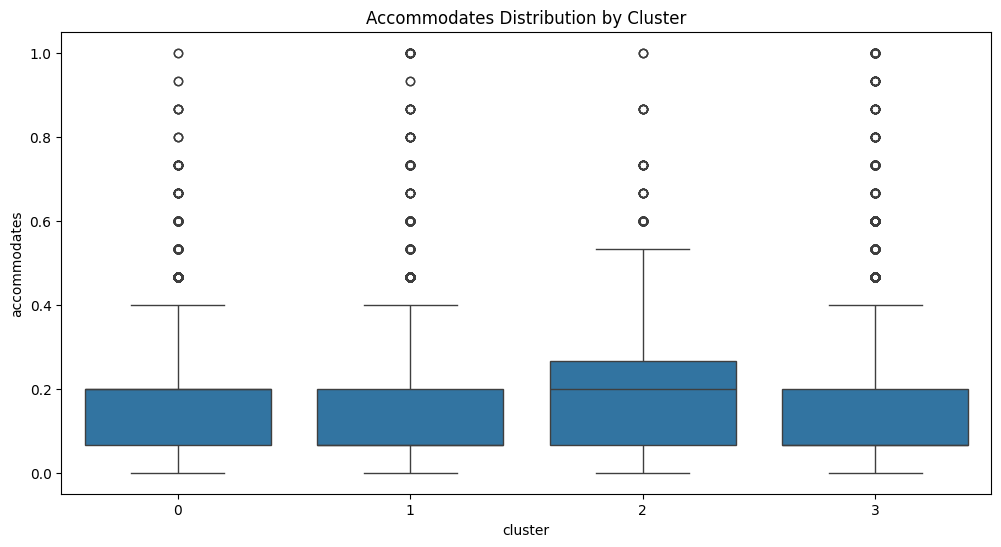

In [ ]:
optimal_k = 4  # to be replaced with the value visually determined from the elbow plot (after my code runs and kernal no longer crashes)

# performing clustering with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, random_state=42, n_init='auto', verbose=0)

# PCA for VISUALIZATION (2 Components) ---
pca_vis = PCA(n_components=2)  # reduced to 2 components for plotting
pca_vis.fit(df_improved_model)  # fitting PCA on the scaled data, not PCA data

pca_features_viz = pca_vis.transform(df_improved_model)  # transforming the original data
df_pca_vis = pd.DataFrame(pca_features_viz, columns=['PC1', 'PC2'])

df_pca_vis['cluster'] = kmeans.fit_predict(df_pca_vis)

# scatter plot ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca_vis, palette='viridis')
plt.title('Clusters Visualised with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

cluster_labels = kmeans.fit_predict(df_improved_model)

# add cluster labels back to the original dataframe
df_improved_model['cluster'] = cluster_labels

# analysing and comparing clusters

# statistics per cluster 
cluster_summary = df_improved_model.groupby('cluster').describe()
print("\nDescriptive Statistics per Cluster:")
print(tabulate(cluster_summary, headers='keys', tablefmt='pretty'))

# cluster size Distribution
cluster_counts = df_improved_model['cluster'].value_counts().sort_index()
print("\nCluster Size Distribution:")
print(cluster_counts)
# printing the number of data points in each cluster, to check for imbalances 

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Listings')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='accommodates', data=df_improved_model)
plt.title('Accommodates Distribution by Cluster')
plt.show()

In [ ]:
# a global regressor = a single regression that is trained on the entire dataset (linear regression model in part one is a global regressor)
# a local regressor = separate regression models that are trained on subsets of the data. These subsets are defined by the clusters I created. The idea is that the relationship between features and the target variable might be different within different clusters.

# makes predictions on the Part 1 test set using the Part 1 model
y_pred_global = model.predict(X_test) # uses the test set from Part 1 as global regressor

# calculate RMSE and R2 for the global model
rmse_global = np.sqrt(mean_squared_error(y_test, y_pred_global)) 
r2_global = r2_score(y_test, y_pred_global)
print(f'Global Model (from Part 1): RMSE = {rmse_global:.2f}, R2 = {r2_global:.2f}')

# training local regressors, one for each cluster
cluster_rmses = {}
cluster_r2s = {}

# Merge price back into the clustered dataset
df_improved_model = pd.concat([df_improved_model, df_model[['price']]], axis=1)


for cluster_num in df_improved_model['cluster'].unique():
    print(f"\nTraining model for cluster: {cluster_num}")
# split data into training and testing sets for the data *in this cluster*

    cluster_data = df_improved_model[df_improved_model['cluster'] == cluster_num]
    X_cluster = cluster_data.drop(['price', 'cluster'], axis=1) # exclude price and cluster
    y_cluster = cluster_data['price']

    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42) # You can also test other testing sizes
    # create and train the local model
    local_model = LinearRegression()
    local_model.fit(X_train, y_train)
    # makes predictions on the test set for this cluster
    y_pred_cluster = local_model.predict(X_test)
    # evaluates the local model
    rmse_cluster = np.sqrt(mean_squared_error(y_test, y_pred_cluster)) # Calculate RMSE manually
    r2_cluster = r2_score(y_test, y_pred_cluster)

    cluster_rmses[cluster_num] = rmse_cluster
    cluster_r2s[cluster_num] = r2_cluster

    print(f'Cluster {cluster_num}: RMSE = {rmse_cluster:.2f}, R2 = {r2_cluster:.2f}')

# comparisons
print("\n--- Model Comparison ---")
print("Global Model Performance:")
print(f"RMSE: {rmse_global:.2f}, R2: {r2_global:.2f}")

print("\nLocal Model Performance:")
for cluster_num in cluster_rmses:
    print(f"Cluster {cluster_num}: RMSE = {cluster_rmses[cluster_num]:.2f}, R2: {cluster_r2s[cluster_num]:.2f}")

Global Model (from Part 1): RMSE = 0.41, R2 = 0.70

Training model for cluster: 2
Cluster 2: RMSE = 0.50, R2 = 0.49

Training model for cluster: 1
Cluster 1: RMSE = 0.39, R2 = 0.78

Training model for cluster: 0
Cluster 0: RMSE = 0.38, R2 = 0.46

Training model for cluster: 3
Cluster 3: RMSE = 0.44, R2 = 0.67

--- Model Comparison ---
Global Model Performance:
RMSE: 0.41, R2: 0.70

Local Model Performance:
Cluster 2: RMSE = 0.50, R2: 0.49
Cluster 1: RMSE = 0.39, R2: 0.78
Cluster 0: RMSE = 0.38, R2: 0.46
Cluster 3: RMSE = 0.44, R2: 0.67


In [ ]:
# final improved model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression  
import warnings 

warnings.filterwarnings('ignore', category=UserWarning, module='pandas')

# defining raw feature names before engineering 

DATE_FEATURES = ['first_review', 'last_review']
TARGET_VARIABLE = 'price'

numeric_data = numeric_data.drop(columns=['price'], errors='ignore')
# removed price from numerical data as it is the target variable

NUMERICAL_FEATURES_RAW = numeric_data
CATEGORICAL_FEATURES_RAW = categorical_data
ID_FEATURES_TO_DROP = ['id', 'host_id']
TEXT_FEATURES_TO_DROP = ['name', 'description', 'amenities'] 
# made decision to exclude these do to subject context

# Load Data ---
df_processed = df.copy()

columns_to_drop = ID_FEATURES_TO_DROP + TEXT_FEATURES_TO_DROP
df_processed = df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns], errors='ignore')

# Feature Engineering (Dates) ---
engineered_date_features = []
for col in DATE_FEATURES:
    if col in df_processed.columns:
        new_col_name = f'days_since_{col}'
        # Used errors='coerce' to turn invalid date formats into NaT (Not a Time)
        df_processed[new_col_name] = (pd.to_datetime('today') - pd.to_datetime(df_processed[col], format='%d/%m/%Y',  errors='coerce')).dt.days
        engineered_date_features.append(new_col_name)
        df_processed = df_processed.drop(columns=[col], errors='ignore')
        print(f"Engineered feature '{new_col_name}' from '{col}'.")

# updated the list of numerical features including engineered ones
numerical_features_final = [col for col in NUMERICAL_FEATURES_RAW if col in df_processed.columns] + engineered_date_features
categorical_features_final = [col for col in CATEGORICAL_FEATURES_RAW if col in df_processed.columns]

# Defining Features (X) and Target (y) ---
all_features = numerical_features_final + categorical_features_final
y = df_processed[TARGET_VARIABLE].copy()
X = df_processed[all_features].copy()

print(f"Features selected for X (count: {len(all_features)}): {all_features}")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Preprocessing Pipelines ---
# Pipeline for numerical features: Imputing missing values then scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
      # handling missing numeric values
])

# Pipeline for categorical features: Imputing missing values then one-hot encode 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # handling missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handling unknown categories during prediction
])

# Combining preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_final),
        ('cat', categorical_transformer, categorical_features_final)
    ],
    remainder='passthrough' 
)

# Full Model Pipeline with SelectKBest ---
# Used SelectKBest for feature selection based on F-value
feature_selector = SelectKBest(f_regression, k=10)  # Selects top 5 features based on the F-value

# Chaining the preprocessor, feature selection, and Linear Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Feature selection step
    ('regressor', LinearRegression())  # Linear Regression model
])

y = np.log(df_processed[TARGET_VARIABLE] + 1)

# Splitting the data before applying the pipeline to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# Training the Model ---
print("Training the model...")
try:
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.")
except Exception as e:
    print(f"\nAn error occurred during model training: {e}")
    exit()

# Predictions and Evaluation ---
print("Making predictions on the test set...")
try:
    predictions = model_pipeline.predict(X_test)

    # Ensure predictions and y_test are valid
    if np.any(np.isnan(predictions)) or np.any(np.isinf(predictions)):
        print("Warning: Predictions contain NaN or Inf values.")
        predictions = np.nan_to_num(predictions, nan=np.nanmedian(predictions)) 

    if np.any(np.isnan(y_test)) or np.any(np.isinf(y_test)):
         print("Warning: y_test contains NaN or Inf values.")
         valid_indices = ~np.isnan(y_test) & ~np.isinf(y_test)
         y_test = y_test[valid_indices]
         predictions = predictions[valid_indices]


    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    print("\nEvaluation Metrics:")
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')

except Exception as e:
     print(f"\nAn error occurred during prediction or evaluation: {e}") 


# Cross Validation ---
print("\nPerforming Cross Validation (5-fold)...") 
try:
    # Use neg_mean_squared_error as scoring, then convert back to positive RMSE
    cv_scores_neg_mse = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) 
    cv_rmse_scores = np.sqrt(-cv_scores_neg_mse) # Convert to positive RMSE
    mean_cv_rmse = np.mean(cv_rmse_scores)

    print(f'Cross Validation RMSE Scores: {cv_rmse_scores}')
    print(f'Mean Cross Validation RMSE: {mean_cv_rmse:.4f}')
except Exception as e:
    print(f"\nAn error occurred during cross-validation: {e}")

print("\nCode Completed.")


Engineered feature 'days_since_first_review' from 'first_review'.
Engineered feature 'days_since_last_review' from 'last_review'.
Features selected for X (count: 21): ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'days_since_first_review', 'days_since_last_review', 'host_name', 'host_since', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type']
Shape of X: (41604, 21)
Shape of y: (41604,)

Data split into training (33283 samples) and testing (8321 samples).
Training the model...
Model training complete.
Making predictions on the test set...

Evaluation Metrics:
RMSE: 0.0629
R2 Score: 0.7616

Performing Cross Validation (5-fold)...
Cross Validation RMSE Scores: [0.06829509 0.06692801 0.06427715 0.0689211  0.06506238]
Mean Cross Validation RMSE: 0.0667

Code Co